# Factors affecting Loan Status of Prosper Loan Data.
## by Teslim Kehinde


## Investigation Overview

In this investigation, I wanted to look at the Factors affecting Prosper Loan Data. The main focus was on the categorical  variables [Term, IncomeRange].



## Dataset Overview

The data consisted of Loan Status and attributes of approximately 130,000 Loans. The attributes included the Term of the loan, Income Range of borrowers, as well as additional measurements such as Borrower Rate, Investors and LP_CustomersPayments. The columns in the data was reduced to 31 from 85, due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# drop columns with nan values
loan = loan.dropna(axis = 1)

In [4]:
# subset the dataframe
col = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'LenderYield',
       'ListingCategory (numeric)', 'IsBorrowerHomeowner','IncomeRange', 'StatedMonthlyIncome', 'LoanNumber',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
       'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'Recommendations', 'Investors']
n_loan = loan[col]

In [5]:
# Convert Term, LoanStatus, Income range to categorical datatype
ordinal_var_diction = {'Term': [12, 36, 60],
                    'LoanStatus': ['Completed', 'FinalPaymentInProgress', 'Current', 'Defaulted', 'Chargedoff',                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
                                   'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                    '$75,000-99,999', '$100,000+']}

for variable in ordinal_var_diction:
    ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_diction[variable])
    n_loan[variable] = n_loan[variable].astype(ordered_variable)


## Distribution of Loan Status.

There are more Loans that are current, i.e that have all the payments updated but not yet completed.
Loans with Updated Payment i.e current loans, are more rampant in the dataset, followed by completed loans. Plotted in horizontal axis to depict visualization in a more clearer way.

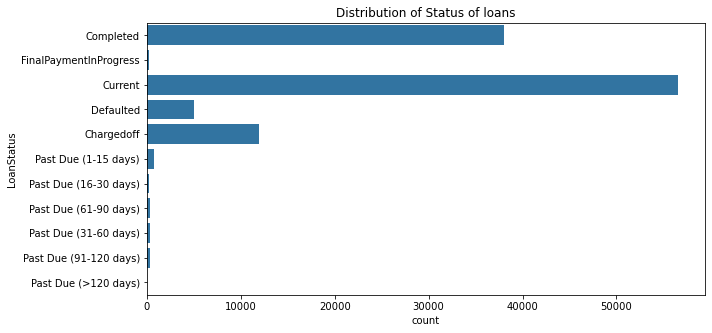

In [6]:
plt.figure(figsize = (10, 5))
base_color = sb.color_palette()[0]
sb.countplot(data = n_loan, y = 'LoanStatus', color = base_color);
plt.title('Distribution of Status of loans');

## Distribution of Income Range of Borrowers.

Income range of Borrowers with $25,000 - 49,999 are more rampant in the dataset, with an increase in the Loan rate as the range of loan increases.

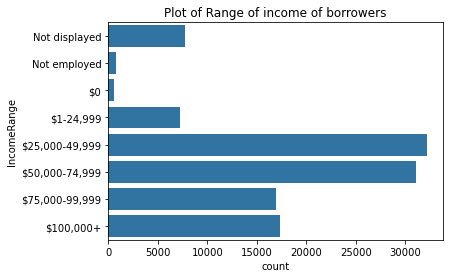

In [7]:
sb.countplot(data = n_loan, y = 'IncomeRange', color = base_color);
plt.title('Plot of Range of income of borrowers');


## Distribution of Term of Loans.

Intermediate term loans i.e loans with 36 month, are more than any term of loan in the dataset.

Text(0.5, 0, 'Terms (month)')

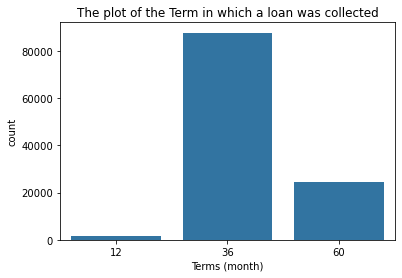

In [8]:
sb.countplot(data = n_loan, x = 'Term', color = base_color)
plt.title("The plot of the Term in which a loan was collected")
plt.xlabel('Terms (month)')

## Loan Status vs IncomeRange

Plotting the Loan Status and Income Range, depicts that most of the loans are up to date, and they are  mostly Intermediate in nature.

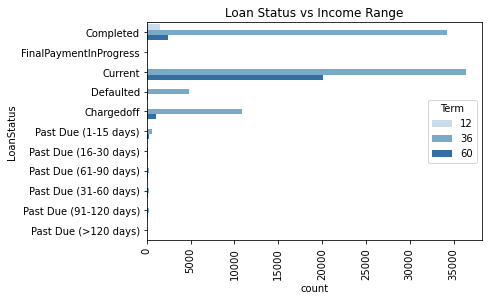

In [9]:
sb.countplot(data = n_loan, y = 'LoanStatus', hue = 'Term', palette = 'Blues');
plt.xticks(rotation = 90);
plt.title('Loan Status vs Income Range');

In [11]:
!jupyter nbconvert Prosper_Loan_data_report_part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loan_data_report_part2.ipynb to slides
[NbConvertApp] Writing 659528 bytes to Prosper_Loan_data_report_part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Teslim\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Teslim\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Teslim\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Teslim\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Teslim\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_noteboo